In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Set operations to 3 decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set presets for visualizations
sns.set(style="darkgrid")
# plt.rcParams["figure.figsize"] = [10, 5]

### Load data and some summary descriptive statistics of the data

---


In [54]:
# Load the data
df = pd.read_csv("Burnout.csv")
df.head()

,Timestamp,Do you grant your consent to participate in this survey?,Gender,Age,Kindly select your university of study,Level,Religion,Location,Ethnicity,Study's financing,...,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
0,2024/07/16 12:19:19 PM PDT,Yes,Female,21 - 23,UG,400,Cristian,Off Campus,Ga,Family,...,6,6,6,0,6,6,6,6,6,6
1,2024/07/16 12:23:35 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Others,Family,...,3,3,3,3,3,3,3,3,3,3
2,2024/07/16 12:26:52 PM PDT,Yes,Male,24 - 27,COHk,300,Cristian,Off Campus,Others,Family,...,0,6,0,0,3,2,6,6,6,6
3,2024/07/16 12:37:54 PM PDT,Yes,Male,21 - 23,COHk,300,Muslim,Off Campus,Others,Family,...,6,6,6,6,3,3,0,6,6,6
4,2024/07/16 12:38:43 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Akan,Family,...,3,1,2,3,3,2,6,6,5,6


In [55]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

In [56]:
# length of numerical and categorical variables

print(f'Number of numerical variables: {len(numerical_cols)}\nNumber of categorical variables: {len(categorical_cols)}')

Number of numerical variables: 16
Number of categorical variables: 11


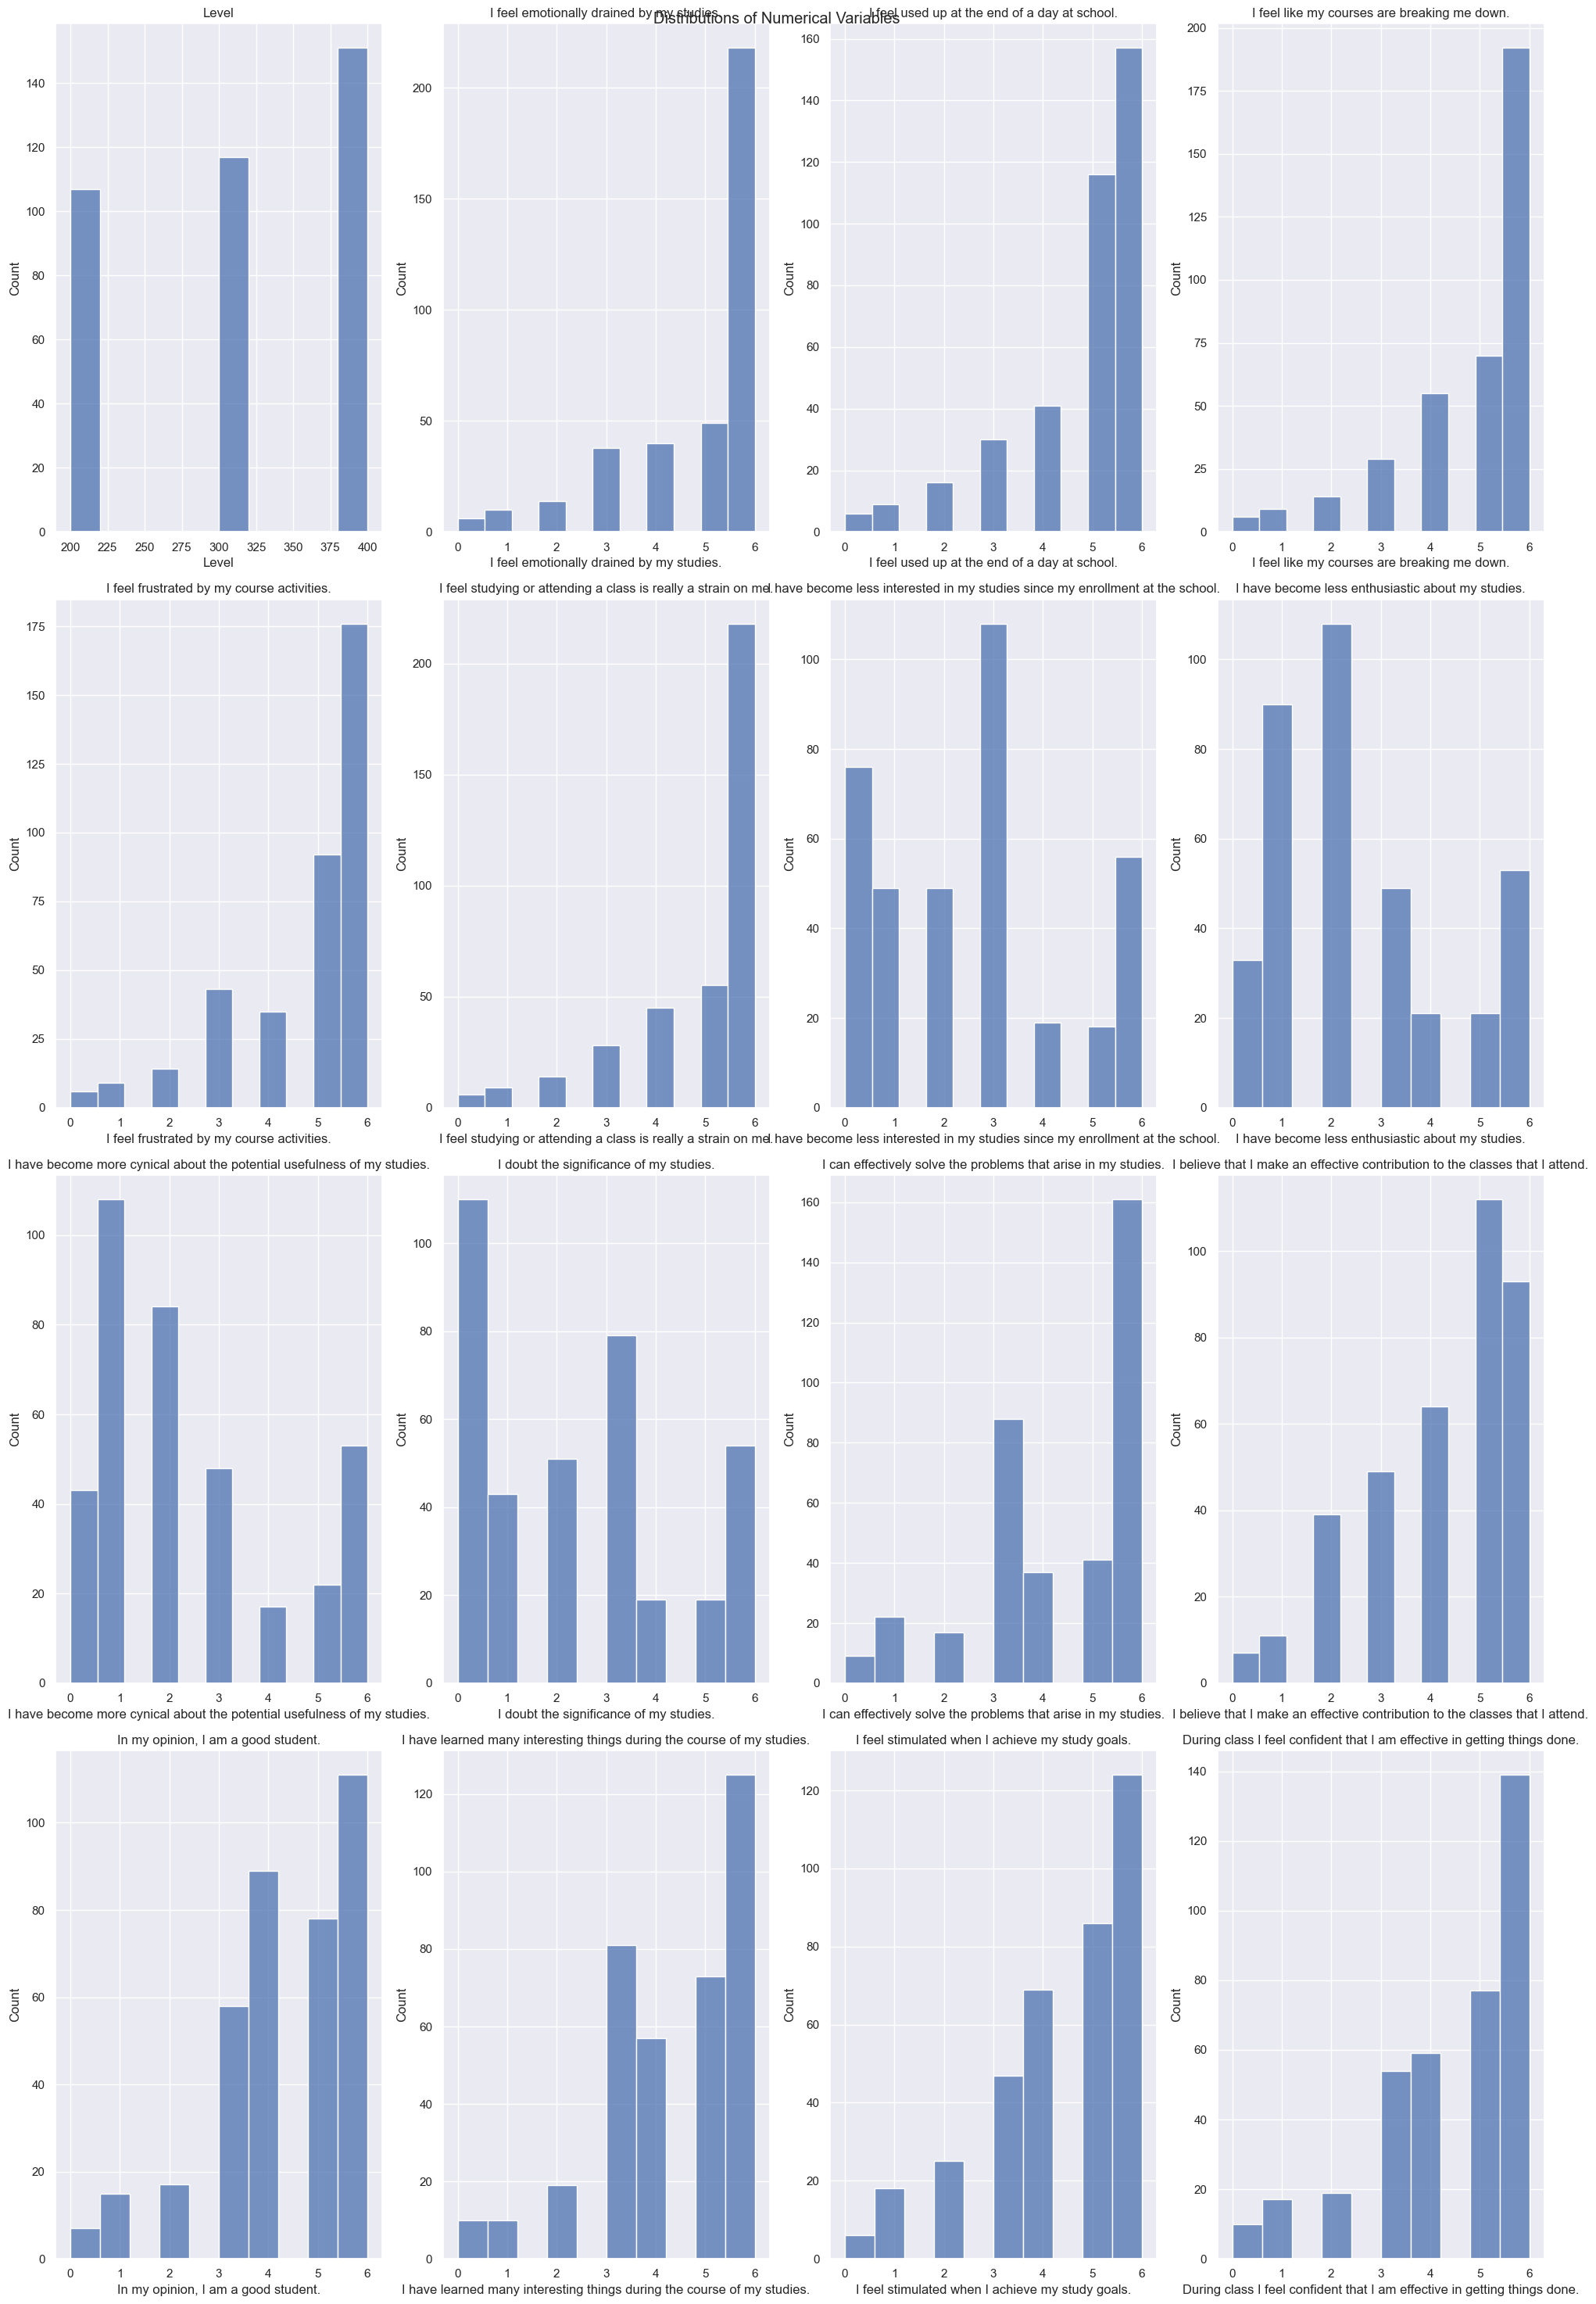

In [65]:
# distributions of numerical variables with grid (5, 2)

fig, axes = plt.subplots(4, 4, figsize=(20, 30))
fig.suptitle("Distributions of Numerical Variables")

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_cols):
        sns.histplot(df[numerical_cols[i]], ax=ax)
        ax.set_title(numerical_cols[i])

plt.tight_layout()
plt.show()



In [15]:
df.columns

Index(['Timestamp', 'Do you grant your consent to participate in this survey?',
       'Gender', 'Age', 'Kindly select your university of study', 'Level',
       'Religion', 'Location', 'Ethnicity', 'Study's financing',
       'Medications intake due to studies',
       'Is radiography your desired profession?',
       'I feel emotionally drained by my studies.',
       'I feel used up at the end of a day at school.',
       'I feel like my courses are breaking me down.',
       'I feel frustrated by my course activities.',
       'I feel studying or attending a class is really a strain on me.',
       'I have become less interested in my studies since my enrollment at the school.',
       'I have become less enthusiastic about my studies.',
       'I have become more cynical about the potential usefulness of my studies.',
       'I doubt the significance of my studies.',
       'I can effectively solve the problems that arise in my studies.',
       'I believe that I make an effective

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 27 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       375 non-null    object
 1   Do you grant your consent to participate in this survey?                        375 non-null    object
 2   Gender                                                                          375 non-null    object
 3   Age                                                                             375 non-null    object
 4   Kindly select your university of study                                          375 non-null    object
 5   Level                                                                           375 non-null    int64 
 6   Religion                  

In [9]:
df.describe()

,Level,I feel emotionally drained by my studies.,I feel used up at the end of a day at school.,I feel like my courses are breaking me down.,I feel frustrated by my course activities.,I feel studying or attending a class is really a strain on me.,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
count,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000
mean,311.733,4.973,4.845,4.923,4.859,5.024,2.595,2.560,2.443,2.339,4.371,4.293,4.360,4.357,4.424,4.459
std,82.221,1.504,1.413,1.445,1.458,1.458,1.977,1.846,1.913,2.088,1.739,1.523,1.504,1.579,1.568,1.633
min,200.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,200.000,4.000,4.000,4.000,4.000,4.000,1.000,1.000,1.000,0.000,3.000,3.000,3.000,3.000,3.000,3.000
50%,300.000,6.000,5.000,6.000,5.000,6.000,3.000,2.000,2.000,2.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,400.000,6.000,6.000,6.000,6.000,6.000,3.000,4.000,3.000,3.000,6.000,5.000,6.000,6.000,6.000,6.000
max,400.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000


In [13]:
# Check for missing values
def check_missing(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing = pd.DataFrame(missing, columns=[""])
    return missing


check_missing(df)

,Missing


### Calculate Burnout Scores for each category

---


In [14]:
# Emotional Exhaustion (EE)
ee_columns = [
    "I feel emotionally drained by my studies.",
    "I feel used up at the end of a day at school.",
    "I feel like my courses are breaking me down.",
    "I feel frustrated by my course activities.",
    "I feel studying or attending a class is really a strain on me.",
]

# Cynicism (CY)
cy_columns = [
    "I have become less interested in my studies since my enrollment at the school.",
    "I have become less enthusiastic about my studies.",
    "I have become more cynical about the potential usefulness of my studies.",
    "I doubt the significance of my studies.",
]

# Academic Efficacy (AE)
ae_columns = [
    "I can effectively solve the problems that arise in my studies.",
    "I believe that I make an effective contribution to the classes that I attend.",
    "In my opinion, I am a good student.",
    "I have learned many interesting things during the course of my studies.",
    "I feel stimulated when I achieve my study goals.",
    "During class I feel confident that I am effective in getting things done.",
]

# Calculate scores
df["EE_Score"] = df[ee_columns].mean(axis=1)
df["CY_Score"] = df[cy_columns].mean(axis=1)
df["AE_Score"] = df[ae_columns].mean(axis=1)

# Calculate overall burnout score (you may need to adjust this based on your specific methodology)
df["Burnout_Score"] = (df["EE_Score"] + df["CY_Score"] + (6 - df["AE_Score"])) / 3

# Display summary statistics of burnout scores
print(df[["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]].describe())

       EE_Score  CY_Score  AE_Score  Burnout_Score
count   375.000   375.000   375.000        375.000
mean      4.925     2.484     4.377          3.010
std       1.400     1.820     1.407          0.648
min       0.000     0.000     0.000          1.417
25%       4.400     1.500     3.500          2.533
50%       5.600     1.500     4.667          2.950
75%       6.000     3.125     5.500          3.333
max       6.000     6.000     6.000          5.500


In [16]:
# Emotional Exhaustion (EE)
ee_columns = [
    "I feel emotionally drained by my studies.",
    "I feel used up at the end of a day at school.",
    "I feel like my courses are breaking me down.",
    "I feel frustrated by my course activities.",
    "I feel studying or attending a class is really a strain on me.",
]

# Cynicism (CY)
cy_columns = [
    "I have become less interested in my studies since my enrollment at the school.",
    "I have become less enthusiastic about my studies.",
    "I have become more cynical about the potential usefulness of my studies.",
    "I doubt the significance of my studies.",
]

# Academic Efficacy (AE)
ae_columns = [
    "I can effectively solve the problems that arise in my studies.",
    "I believe that I make an effective contribution to the classes that I attend.",
    "In my opinion, I am a good student.",
    "I have learned many interesting things during the course of my studies.",
    "I feel stimulated when I achieve my study goals.",
    "During class I feel confident that I am effective in getting things done.",
]

# Calculate scores
df["EE_Score"] = df[ee_columns].mean(axis=1)
df["CY_Score"] = df[cy_columns].mean(axis=1)
df["AE_Score"] = df[ae_columns].mean(axis=1)

# Reverse the scores for Academic Efficacy as it measures reduced personal accomplishment
df["AE_Score"] = 6 - df["AE_Score"]
# Calculate overall burnout score
df["Burnout_Score"] = 0.4 * df["EE_Score"] + 0.3 * df["CY_Score"] + 0.3 * df["AE_Score"]
# Display summary statistics of burnout scores
print(df[["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]].describe())

       EE_Score  CY_Score  AE_Score  Burnout_Score
count   375.000   375.000   375.000        375.000
mean      4.925     2.484     1.623          3.202
std       1.400     1.820     1.407          0.649
min       0.000     0.000     0.000          1.500
25%       4.400     1.500     0.500          2.772
50%       5.600     1.500     1.333          3.100
75%       6.000     3.125     2.500          3.515
max       6.000     6.000     6.000          5.550


<Axes: xlabel='Burnout_Score', ylabel='Count'>

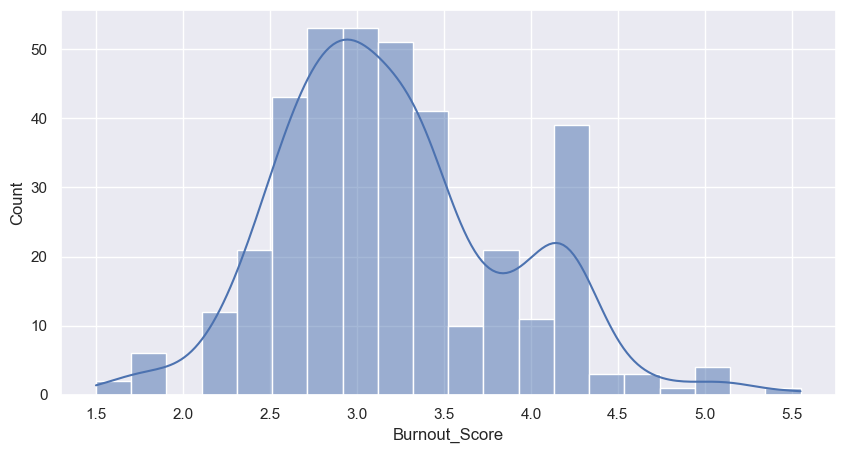

In [20]:
# Plot the distribution of burnout scores
sns.histplot(df["Burnout_Score"], kde=True)

In [21]:
# Define burnout threshold (you may need to adjust this based on your specific criteria)
burnout_threshold = 3.0

# Calculate prevalence
burnout_prevalence = (df["Burnout_Score"] >= burnout_threshold).mean()
print(f"Overall burnout prevalence: {burnout_prevalence:.2%}")

# Summarize demographic information
print(df["Gender"].value_counts(normalize=True))
print(df["Age"].value_counts(normalize=True))
print(df["Level"].value_counts(normalize=True))
print(df["Religion"].value_counts(normalize=True))

Overall burnout prevalence: 25.60%
Gender
Male     0.512
Female   0.488
Name: proportion, dtype: float64
Age
21 - 23        0.432
24 - 27        0.267
17 - 20        0.232
28 and above   0.069
Name: proportion, dtype: float64
Level
400   0.403
300   0.312
200   0.285
Name: proportion, dtype: float64
Religion
Cristian   0.896
Muslim     0.104
Name: proportion, dtype: float64


In [33]:
# Prepare independent variables
X = pd.get_dummies(
    df[
        [
            "Gender",
            "Age",
            "Level",
            "Religion",
            "Location",
            "Ethnicity",
            "Study's financing",
            "Medications intake due to studies",
        ]
    ],
    drop_first=True,
)

# Add constant term to the independent variables
X = sm.add_constant(X)

# Perform multiple regression for overall burnout score
model = sm.OLS(df["Burnout_Score"].astype(float), X.astype(float)).fit()

# Create a summary table
summary_table = pd.DataFrame(
    {
        # "Variable": model.params.index,
        "Coefficient": model.params.values,
        "Std Error": model.bse,
        "t-value": model.tvalues,
        "p-value": model.pvalues,
        "[0.025": model.conf_int()[0],
        "0.975]": model.conf_int()[1],
    }
)

summary_table

,Coefficient,Std Error,t-value,p-value,[0.025,0.975]
const,3.702,0.199,18.609,0.000,3.311,4.093
Level,-0.001,0.001,-2.727,0.007,-0.002,-0.000
Gender_Male,0.040,0.069,0.575,0.566,-0.096,0.175
Age_21 - 23,-0.046,0.090,-0.518,0.605,-0.222,0.130
Age_24 - 27,-0.081,0.102,-0.801,0.424,-0.282,0.119
Age_28 and above,0.266,0.159,1.680,0.094,-0.045,0.578
Religion_Muslim,-0.170,0.146,-1.165,0.245,-0.458,0.117
Location_Off Campus,0.079,0.092,0.852,0.395,-0.103,0.260
Ethnicity_Ewe,0.026,0.102,0.254,0.800,-0.175,0.227
Ethnicity_Ga,-0.018,0.090,-0.201,0.841,-0.196,0.160


## Test 2

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as stats



# Example columns to analyze (modify according to your dataset)
columns_to_analyze = ['Gender', 'Age', 'Level', 'Religion', 'Location', 'Ethnicity', 'Study\'s financing']

# Define a new variable 'Group' if necessary (e.g., based on a level of study or other categorization)
# df['Group'] = df['Level'].apply(lambda x: 'Senior' if x in ['400', '500'] else 'Junior')
df['Group'] = df['Level']
# Initialize the results list
results = []

# Loop through each column and group by the 'Group' variable
for col in columns_to_analyze:
    # Get cross-tabulation
    crosstab = pd.crosstab(df[col], df['Group'], normalize='columns') * 100
    
    # Perform Chi-square test
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df[col], df['Group']))
    
    # Add p-value to the results
    crosstab['p-value'] = p
    
    # Append to the results
    results.append(crosstab)

# Concatenate results into a single DataFrame
final_table = pd.concat(results, keys=columns_to_analyze)

# Display the final table
final_table


Group                              200     300     400  p-value
Gender            Female        39.252  55.556  50.331    0.045
                  Male          60.748  44.444  49.669    0.045
Age               17 - 20       43.925  16.239  13.907    0.000
                  21 - 23       42.991  42.735  43.709    0.000
                  24 - 27       13.084  31.624  32.450    0.000
                  28 and above   0.000   9.402   9.934    0.000
Level             200          100.000   0.000   0.000    0.000
                  300            0.000 100.000   0.000    0.000
                  400            0.000   0.000 100.000    0.000
Religion          Cristian      95.327  88.034  86.755    0.068
                  Muslim         4.673  11.966  13.245    0.068
Location          Campus        88.785  16.239  15.894    0.000
                  Off Campus    11.215  83.761  84.106    0.000
Ethnicity         Akan          36.449  41.880  33.113    0.774
                  Ewe           18.692  15.385  17.881    0.774
                  Ga            22.430  23.932  23.179    0.774
                  Others        22.430  18.803  25.828    0.774
Study's financing Family        78.505  78.632  80.795    0.011
                  Loan           0.935   7.692   3.311    0.011
                  Scholarship   19.626  10.256   9.934    0.011
                  Self           0.935   3.419   5.960    0.011

In [69]:
print(final_table)

Group                              200     300     400  p-value
Gender            Female        39.252  55.556  50.331    0.045
                  Male          60.748  44.444  49.669    0.045
Age               17 - 20       43.925  16.239  13.907    0.000
                  21 - 23       42.991  42.735  43.709    0.000
                  24 - 27       13.084  31.624  32.450    0.000
                  28 and above   0.000   9.402   9.934    0.000
Level             200          100.000   0.000   0.000    0.000
                  300            0.000 100.000   0.000    0.000
                  400            0.000   0.000 100.000    0.000
Religion          Cristian      95.327  88.034  86.755    0.068
                  Muslim         4.673  11.966  13.245    0.068
Location          Campus        88.785  16.239  15.894    0.000
                  Off Campus    11.215  83.761  84.106    0.000
Ethnicity         Akan          36.449  41.880  33.113    0.774
                  Ewe           18.692  